In [2]:
# logistic regression
# [分類問題を解く方法、ロジスティック回帰を使ってみよう｜Pythonで機械学習vol.3｜TechClips[テッククリップス]](https://tech-clips.com/article/371624)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

# cancer data
from sklearn.datasets import load_breast_cancer

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [31]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

clf = LogisticRegression()

In [35]:
clf.fit(X_train,y_train)
clf.score(X_train, y_train)
clf.score(X_test, y_test)
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [38]:
# wrong = 0
# for i,j in zip(clf.predict(X_test), y_test):
#     if i == j:
#         print(i, j)
#     else:
#         print(i, j, " Wrong!")
#         wrong += 1

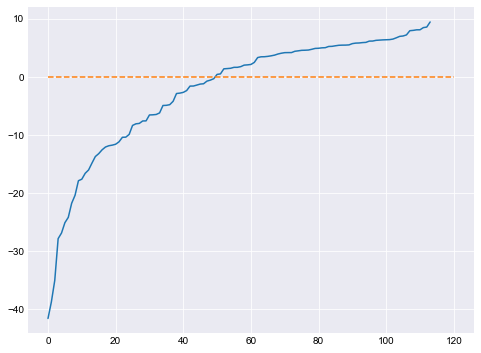

In [43]:
X_test_value = clf.decision_function(X_test)

plt.figure(figsize=(8,6))
plt.plot(np.sort(X_test_value))
plt.plot([0, 120], [0, 0], linestyle='--')

(0, 1)

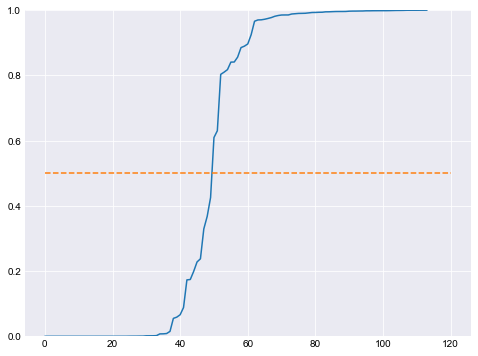

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.figure(figsize=(8,6))
plt.plot(np.sort(sigmoid(X_test_value)))
plt.plot([0, 120], [0.5, 0.5], linestyle='--')
plt.ylim(0, 1)